#**Color Detection**
Color detection is the technique of identifying any color's name. Isn't that easy? Well, this is a really simple assignment for people, but it is more complicated for computers. Light is converted into colour by the eyes and brains of living things. Our eyes have light receptors that send the signal to the brain. The colour is then recognised by our brain. In Computer to find colour names, that is quite similar.

In [ ]:
import pandas as pd # For Loading and Reading CSV file

In [ ]:
#Get CSV File
df = pd.read_csv('https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv')

The colors.csv file includes 865 color names along with their RGB and hex values.

In [ ]:
df

,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
...,...,...,...,...,...,...
859,yellow_orange,Yellow Orange,#ffae42,255,174,66
860,yellow_process,Yellow (Process),#ffef00,255,239,0
861,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
862,zaffre,Zaffre,#0014a8,0,20,168


In [ ]:
# Download the Image Files
!wget https://wagestream.com/wp-content/uploads/2020/04/trackwages_front.png


--2022-07-08 04:53:29--  https://wagestream.com/wp-content/uploads/2020/04/trackwages_front.png
Resolving wagestream.com (wagestream.com)... 65.8.178.56, 65.8.178.25, 65.8.178.46, ...
Connecting to wagestream.com (wagestream.com)|65.8.178.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141448 (138K) [image/png]
Saving to: ‘trackwages_front.png’

trackwages_front.pn 100%[===================>] 138.13K   460KB/s    in 0.3s    

2022-07-08 04:53:30 (460 KB/s) - ‘trackwages_front.png’ saved [141448/141448]



In [ ]:
!wget https://cdn.dribbble.com/users/467044/screenshots/15472186/media/56c1733a00075edb3d98a31366304e9f.png

--2022-07-08 04:53:30--  https://cdn.dribbble.com/users/467044/screenshots/15472186/media/56c1733a00075edb3d98a31366304e9f.png
Resolving cdn.dribbble.com (cdn.dribbble.com)... 192.229.210.197
Connecting to cdn.dribbble.com (cdn.dribbble.com)|192.229.210.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 942280 (920K) [image/png]
Saving to: ‘56c1733a00075edb3d98a31366304e9f.png’

56c1733a00075edb3d9 100%[===================>] 920.20K  --.-KB/s    in 0.05s   

2022-07-08 04:53:30 (17.1 MB/s) - ‘56c1733a00075edb3d98a31366304e9f.png’ saved [942280/942280]



In [ ]:
#Import Libraries
from math import sqrt
import random
from PIL import Image

##**K-Means Clustering**
Use the image as a (N_rows X N_columns X N_channels) vector. Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

This is super interesting for several reasons. 
*   The first one is that it does not require any specific training on a huge set of images. 
*   The second one is that you can increase the number of clusters (and, thus, the number of colors), choosing a smaller or higher amount of tones.






In [ ]:
class Point:
  
  def __init__(self, coordinates):
    self.coordinates = coordinates

In [ ]:
class Cluster:
  
  def __init__(self, center, points):
    self.center = center
    self.points = points

In [ ]:
class kMeans:
  
  def __init__(self, n_clusters, min_diff = 1):
    self.n_clusters = n_clusters
    self.min_diff = min_diff
    
  def calculate_center(self, points):    
    n_dim = len(points[0].coordinates)    
    vals = [0.0 for i in range(n_dim)]    
    for p in points:
      for i in range(n_dim):
        vals[i] += p.coordinates[i]
    coords = [(v / len(points)) for v in vals]    
    return Point(coords)
  
  def assign_points(self, clusters, points):
    plists = [[] for i in range(self.n_clusters)]

    for p in points:
      smallest_distance = float('inf')

      for i in range(self.n_clusters):
        distance = euclidean(p, clusters[i].center)
        if distance < smallest_distance:
          smallest_distance = distance
          idx = i

      plists[idx].append(p)
    
    return plists
    
  def fit(self, points):
    clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]
    
    while True:

      plists = self.assign_points(clusters, points)

      diff = 0

      for i in range(self.n_clusters):
        if not plists[i]:
          continue
        old = clusters[i]
        center = self.calculate_center(plists[i])
        new = Cluster(center, plists[i])
        clusters[i] = new
        diff = max(diff, euclidean(old.center, new.center))

      if diff < self.min_diff:
        break

    return clusters

In [ ]:
def euclidean(p, q):
  n_dim = len(p.coordinates)
  return sqrt(sum([
      (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
  ]))

In [ ]:
def get_points(image_path):  
  img = Image.open(image_path)
  img.thumbnail((200, 400))
  img = img.convert("RGB")
  w, h = img.size
  
  points = []
  for count, color in img.getcolors(w * h):
    for _ in range(count):
      points.append(Point(color))
    
  return points

In [ ]:
import cv2
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

In [ ]:
# Predict Colors and its values
import sklearn
from sklearn.cluster import KMeans
from collections import Counter

def get_colors(filename, n_colors=3):
  points = get_points(filename)
  clusters = kMeans(n_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]

  image = get_image(filename)
  modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
  clf = KMeans(n_clusters = n_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  return list(map(rgb_to_hex, rgbs)), counts.values()

##**Testing**
Pick some colored images and pass it throught the unsupervised learning model and it will return the colors as well as its values

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image as CImage

In [ ]:
image_path = '56c1733a00075edb3d98a31366304e9f.png'

In [ ]:
colors, values  = get_colors(image_path, n_colors=5)
colors = list(colors)

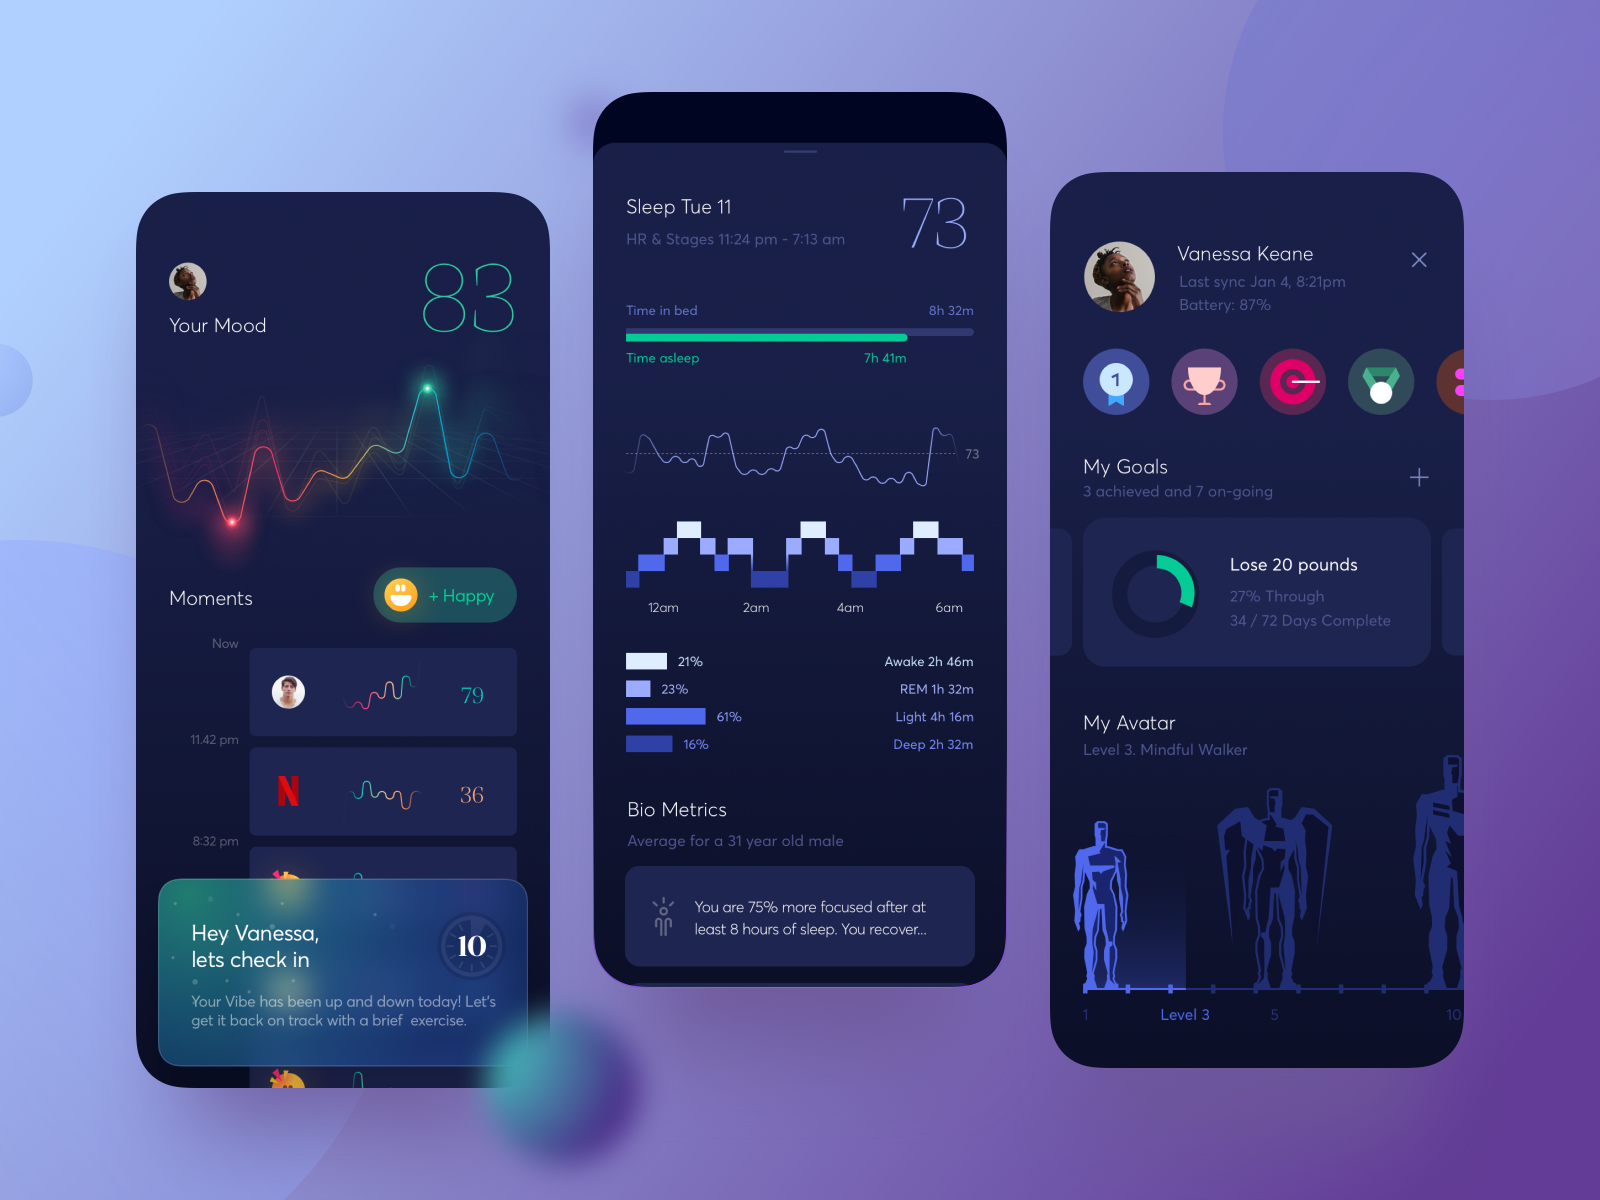

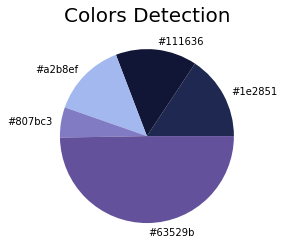

In [ ]:
plt.title('Colors Detection', fontsize=20)
hex_colors = colors
plt.pie(values, labels = hex_colors, colors = hex_colors)

#Show image
CImage(image_path, width=500, height=400)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


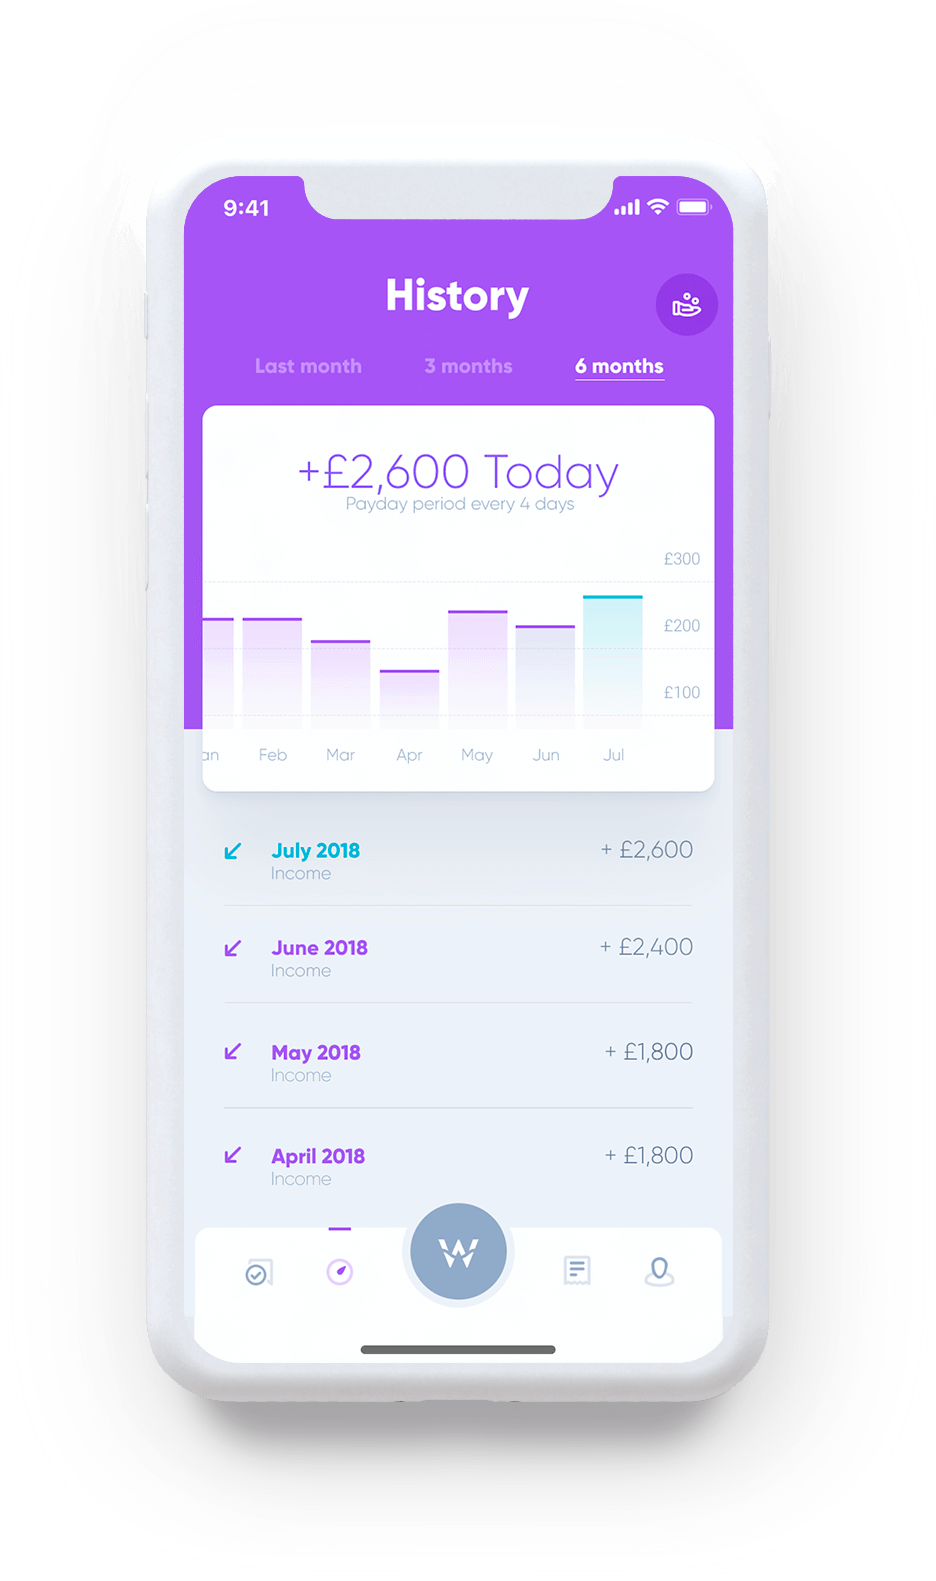

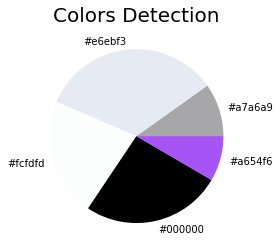

In [ ]:
image_path = 'trackwages_front.png'
colors, values  = get_colors(image_path, n_colors=5)
colors = list(colors)
plt.title('Colors Detection', fontsize=20)
hex_colors = colors
plt.pie(values, labels = hex_colors, colors = hex_colors)

#Show image
CImage(image_path, width=300, height=500)

In [ ]:
# def hex_to_rgb(hex):
#   return tuple(int(hex[i:i+2], 16) for i in (0, 2, 4)) 
# colors = list(colors)
# hex_to_rgb('a7a6a9')
# # extracted_colors = [hex_to_rgb(col) for col in colors]
# # extracted_colors